In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import inventorize as inv
import matplotlib.pyplot as plt

In [3]:
price = [5,10,15,17,20,23,25]
demand = [600,550, 700, 680, 500, 400, 250]

In [7]:
pricing_data = pd.DataFrame({'price': price, 'demand': demand})

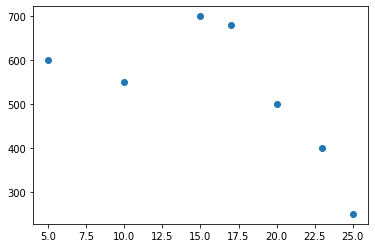

In [10]:
plt.scatter(price, demand)

In [12]:
logit_linear = inv.single_product_optimization(price, demand,  'Mango', 20, 4)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [13]:
predictions_data = logit_linear['predictions']

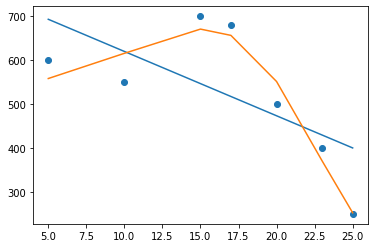

In [17]:
plt.scatter(predictions_data.x, predictions_data.y)
plt.plot(predictions_data.x, predictions_data.lm_p)
plt.plot(predictions_data.x, predictions_data.logit_p)

In [18]:
logit_linear['point_of_maximum_profits']

{'linear': array([28.19352842]), 'logit': array([19.19352842])}

In [19]:
logit_linear.keys()

dict_keys(['optimization_paremeters', 'lm_model', 'squared_error_logit', 'squared_error_linear', 'simulation_data', 'best_model', 'optimum_linear', 'optimum_logit', 'current_price', 'article_name', 'predictions', 'point_of_maximum_profits'])

In [20]:
import os 
path = os.getcwd()
print(path)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/Jupyternotebook_source/Section_20_logit_price_response_function


In [21]:
retail_clean = pd.read_csv('{0}/retail_clean.csv'.format(path))

In [22]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [23]:
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])

In [25]:
retail_clean['year'] = retail_clean['InvoiceDate'].dt.year
retail_clean['week'] = retail_clean['InvoiceDate'].dt.week

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [26]:
retail_clean['weekyear'] = retail_clean['InvoiceDate'].dt.strftime('%W %Y')

In [27]:
weekly_sales = retail_clean.groupby(['Description', 'weekyear']).agg(
    total_sales = ('Quantity', 'sum'),
    price = ('Price', 'mean')
).reset_index()

In [28]:
keys = weekly_sales.Description.unique()

In [29]:
empty_data_logit = {}

In [30]:
for key in keys:
    try:
        a = weekly_sales[weekly_sales.Description == key]
        cost = 0.4 * max(a['price'])
        current_price = a['price'].mean()
        logit = inv.single_product_optimization(a['price'], a['total_sales'], key, current_price, cost)
        empty_data_logit[key] = logit
    except:
        continue

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/numpy/core/_

In [ ]:
empty_data_logit.keys()

In [ ]:
empty_data_logit[" 50'S CHRISTMAS GIFT BAG LARGE"]